# Project 3: Predicting Algae Growth with Regression

#### Dataset: https://www.kaggle.com/datasets/rukenmissonnier/research-on-algae-growth-in-the-laboratory

## Preprocessing and Understanding Data

In [72]:
# Import relevant libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns

In [5]:
# Load the relevant dataset into a pandas DataFrame
df = pd.read_csv("/Users/work/DataMining/algeas.csv")

df.head()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
0,1011.00,1.11,0.17,0.08,23.39,7.27,9.22,4736.51
1,1206.50,3.29,0.14,0.04,14.74,7.94,9.59,4677.34
2,1450.63,1.67,0.04,0.02,28.58,7.35,4.46,3388.85
3,1158.40,2.48,0.09,0.06,27.18,7.43,6.34,4899.17
4,1159.92,2.15,0.15,0.08,22.52,7.92,6.46,4974.25


In [6]:
df.tail()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
9779,368.58,4.94,0.08,0.02,14.34,7.61,3.21,2920.22
9780,1733.12,5.25,0.01,0.06,22.20,7.74,9.91,2093.47
9781,1898.45,1.90,0.11,0.05,18.53,7.39,7.78,777.25
9782,1832.10,6.08,0.15,0.13,22.63,7.04,4.77,1607.65
9783,467.72,7.71,0.12,0.06,11.52,7.37,3.05,3615.62


In [7]:
# Check the shape of the dataset (number of rows and columns)
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")


Dataset contains 9784 rows and 8 columns.



In [8]:
# Check for missing values in each column
print(df.isnull().sum())

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64


In [9]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [10]:
# Get information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Light        9784 non-null   float64
 1   Nitrate      9784 non-null   float64
 2   Iron         9784 non-null   float64
 3   Phosphate    9784 non-null   float64
 4   Temperature  9784 non-null   float64
 5   pH           9784 non-null   float64
 6   CO2          9784 non-null   float64
 7   Population   9784 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB


In [11]:
# Basic statistics for columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Light,9784.0,1026.172916,565.252246,40.25,539.925,1023.78,1516.085,2009.86
Nitrate,9784.0,4.493676,2.003815,1.00,2.760,4.53,6.210,8.00
Iron,9784.0,0.102977,0.056221,0.01,0.050,0.10,0.150,0.20
Phosphate,9784.0,0.105244,0.054843,0.01,0.060,0.11,0.150,0.20
Temperature,9784.0,19.974967,5.756035,10.00,14.960,20.01,25.000,29.99
pH,9784.0,7.502310,0.286528,7.00,7.260,7.50,7.750,8.00
CO2,9784.0,6.008941,2.299361,2.01,4.040,6.02,7.980,10.00
Population,9784.0,3161.595503,1460.094323,0.00,2055.460,3565.39,4374.555,5250.44


In [12]:
# Since this dataset is primarily numerical values, check for outliers
z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3).sum(axis=0)  # Count outliers per column
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 [0 0 0 0 0 0 0 0]


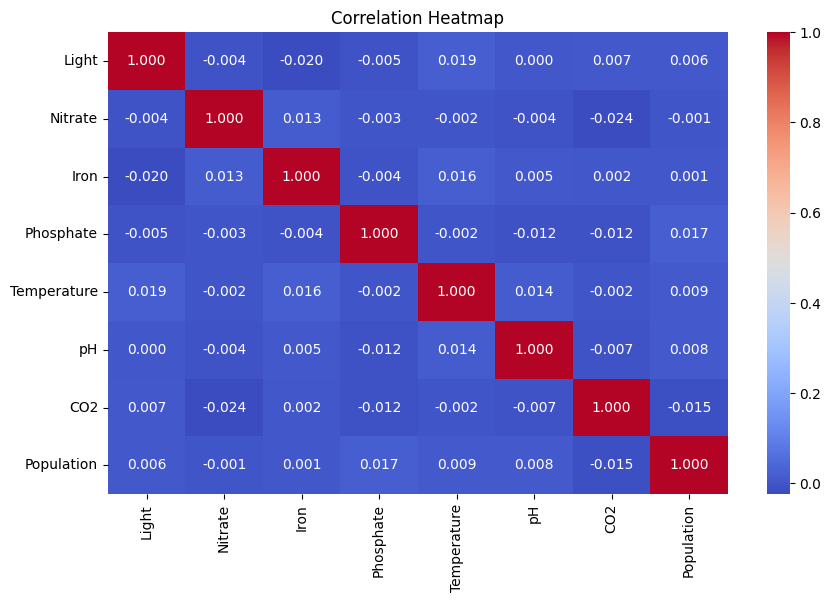

In [45]:
# Correlation Matrix
# Visualize how strongly each factor is related to the target variable, Algae Population
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1200x900 with 0 Axes>

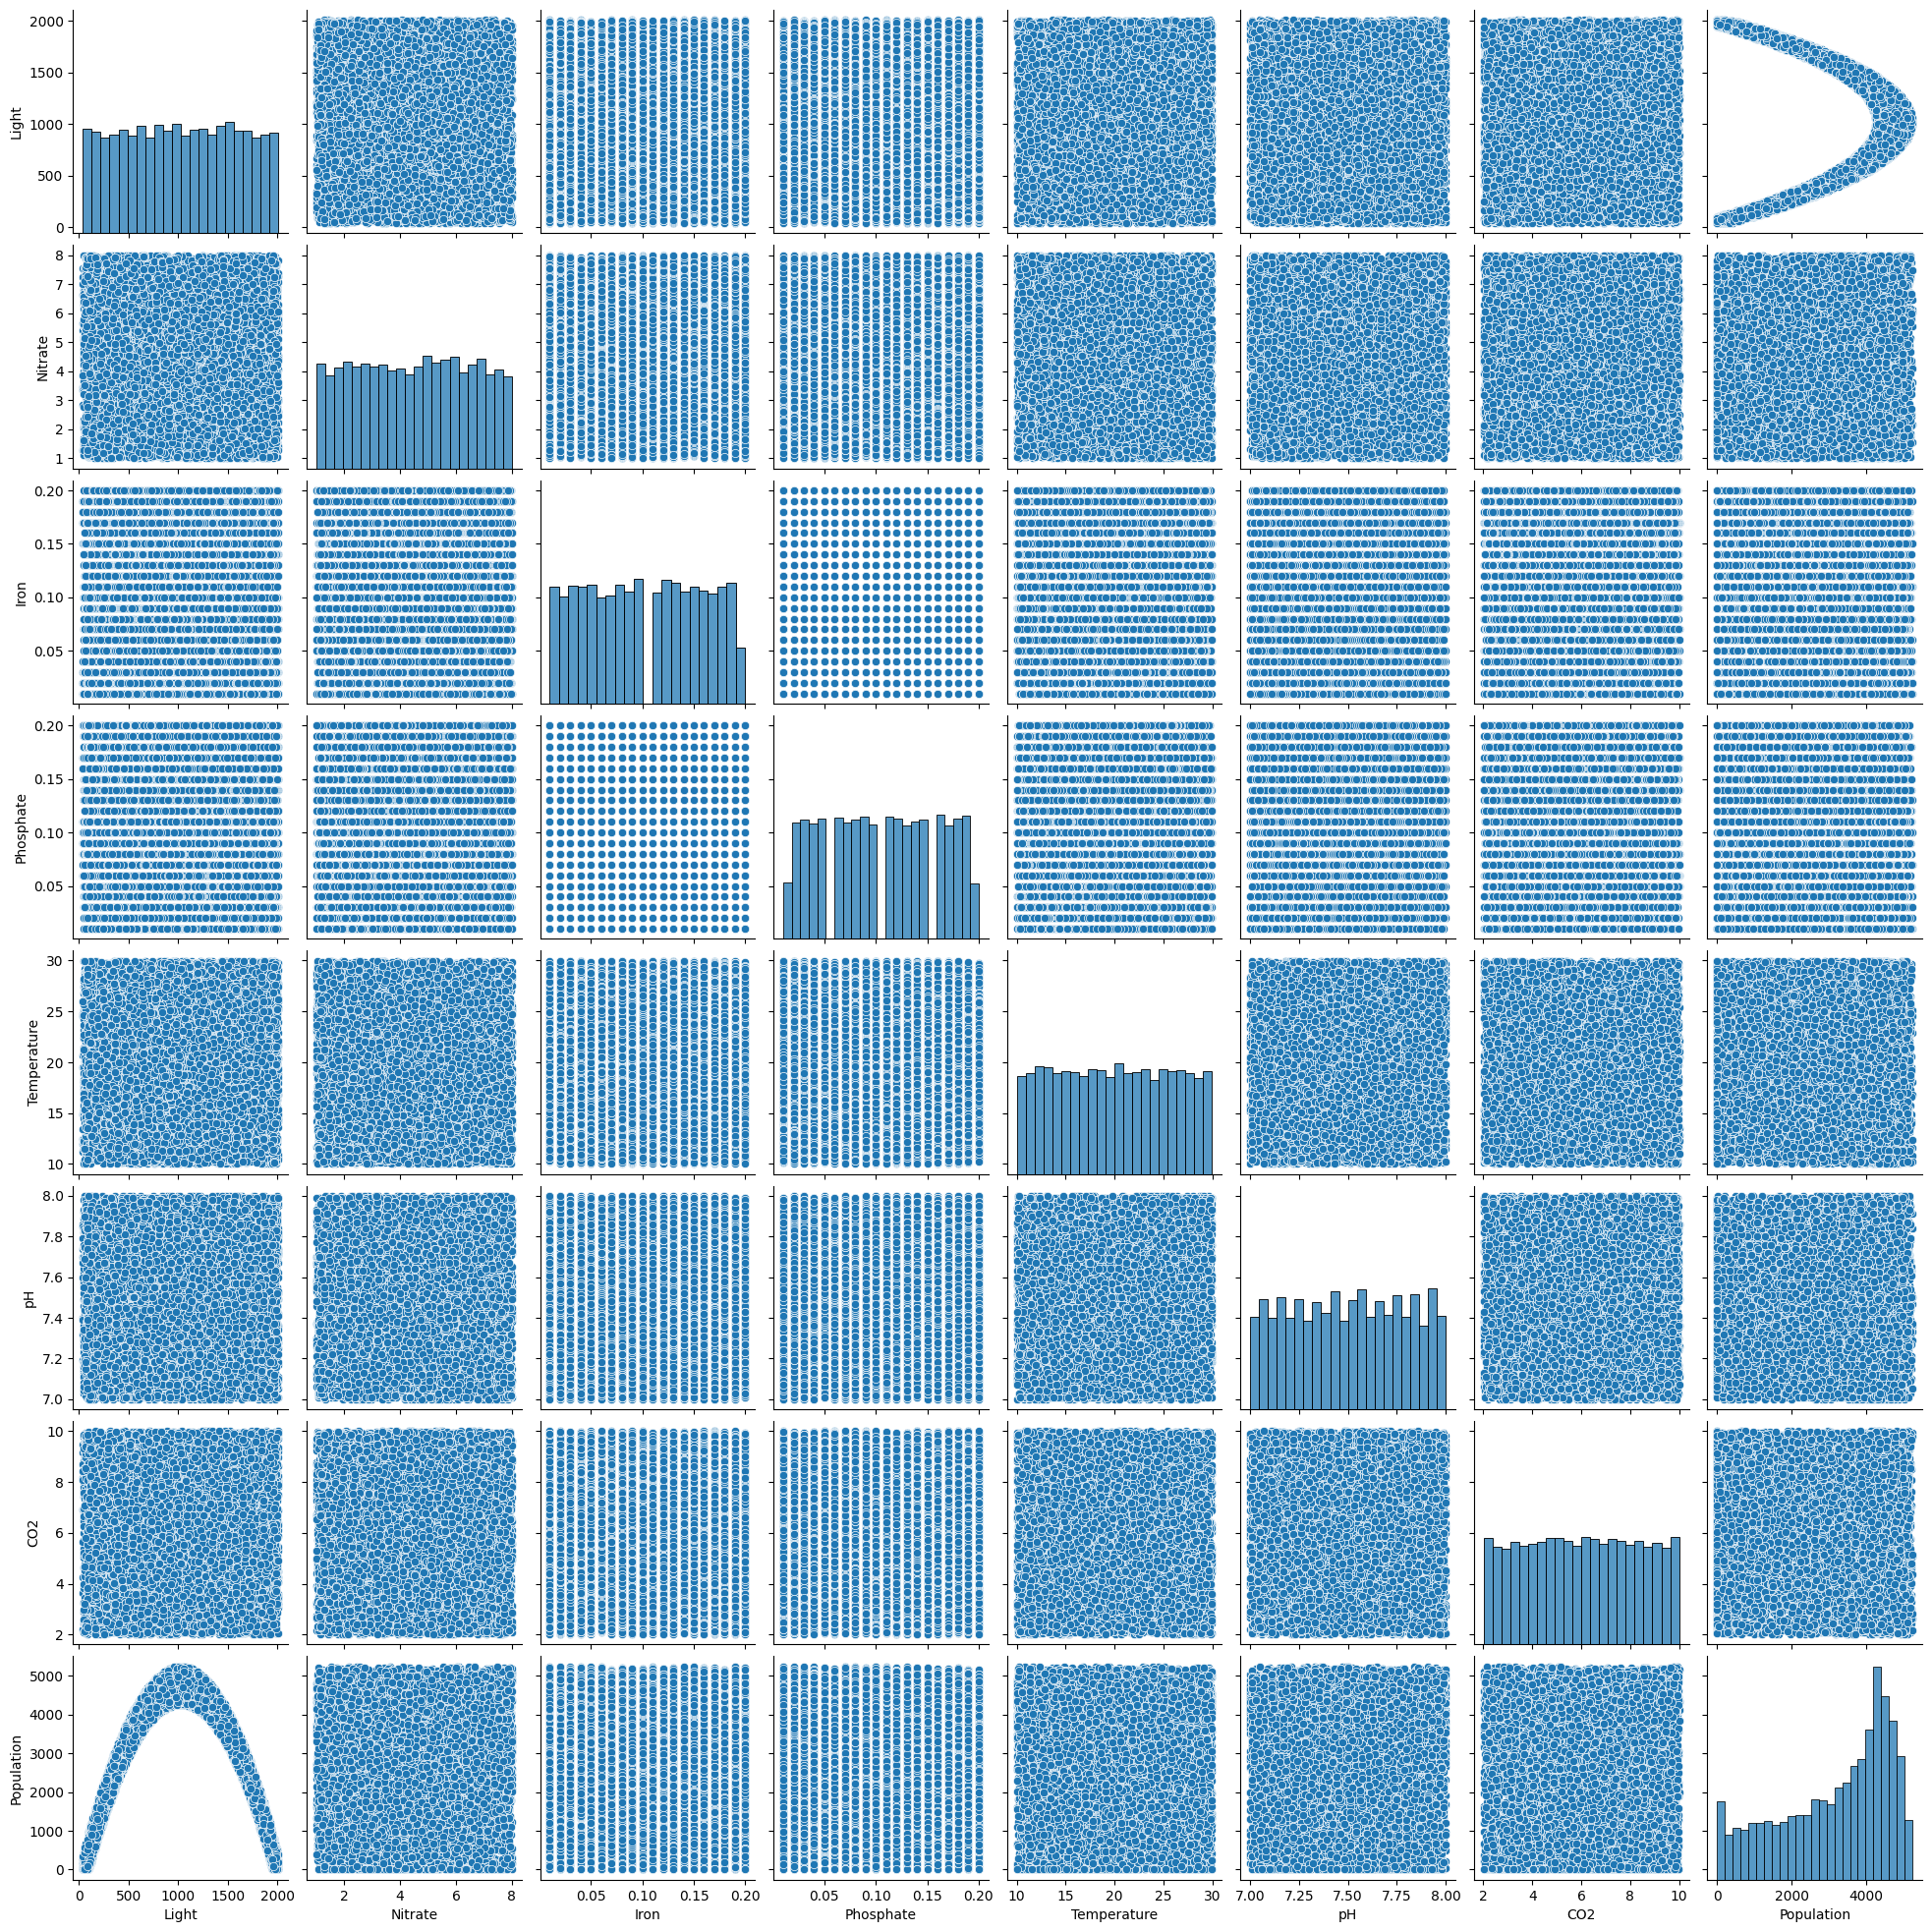

In [14]:
# Creates pairwise scatterplots 
plt.figure(figsize=(12, 9))
sns.pairplot(df)
plt.show()

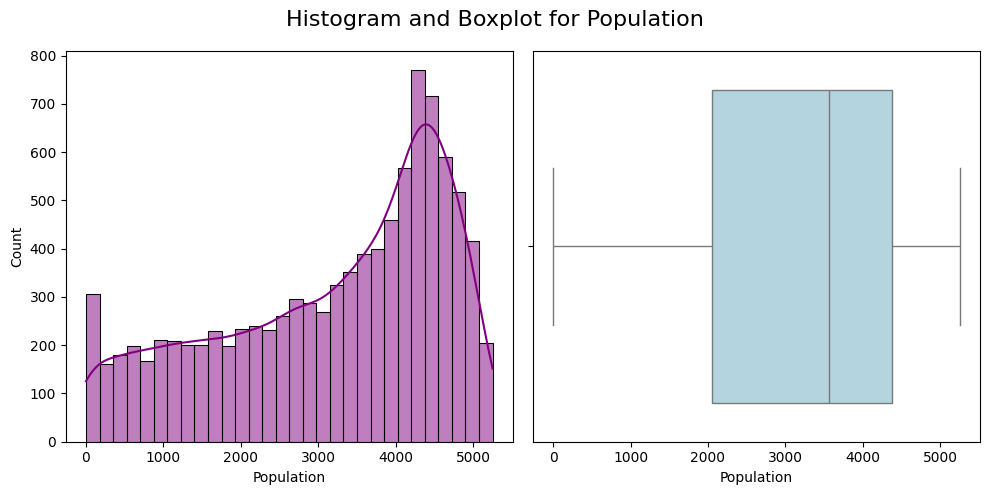

In [15]:
# Focus on the target variable
plt.figure(figsize=(10, 5)) 

# Histogram for Population
plt.subplot(1, 2, 1)  
sns.histplot(df["Population"], bins=30, kde=True, color="purple")

# Boxplot for Population
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Population"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Population", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

In [16]:
# Create arrays for features and target
X = df.drop(columns=["Population"])
y = df["Population"]

## Experiment 1-Linear Regression

In [32]:
# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
# Make predictions based on the test data
y_pred_lr = lr.predict(X_test)

In [62]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
    
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R² Score: ", r2)

Mean Squared Error (MSE):  2157968.088023377
Mean Absolute Error (MAE):  1250.1622083668474
R² Score:  -0.0011355243971442608


In [40]:
# Calculate coefficient of determination to see how well our model performed
coeff = lr.score(X_train, y_train)
print('Coefficient of Determination for Experiment 1:', coeff)

Coefficient of Determination for Experiment 1: 0.000912090525749587


In [80]:
# Test different types of scaling 
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = tts(X_scaled, y, test_size=0.3, random_state=42)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
r2_scale = r2_score(y_test_scaled, y_pred_scaled)

# Normalize features
X_norm = normalize(X)
X_train_n, X_test_n, y_train_n, y_test_n = tts(X_norm, y, test_size=0.3, random_state=42)
lr_norm = LinearRegression()
lr_norm.fit(X_train_n, y_train_n)
y_pred_norm = lr_norm.predict(X_test_n)
r2_norm = r2_score(y_test_n, y_pred_norm)

# Min Max scaling features
mm_scaler = MinMaxScaler()
X_minmax = mm_scaler.fit_transform(X)
X_train_mm, X_test_mm, y_train_mm, y_test_mm = tts(X_minmax, y, test_size=0.3, random_state=42)
lr_mm = LinearRegression()
lr_mm.fit(X_train_mm, y_train_mm)
y_pred_mm = lr_mm.predict(X_test_mm)
r2_mm = r2_score(y_test_mm, y_pred_mm)

print(f"Standardized R² Score: {r2_scale}")
print(f"Normalized R² Score: {r2_norm}")
print(f"MinMaxScaler R² Score: {r2_mm}")

Standardized R² Score: -0.0011355243971444828
Normalized R² Score: 0.2497481393651536
MinMaxScaler R² Score: -0.0011355243971444828


## Experiment 2-Polynomial Regression

In [87]:
# Create a Polynomial Regression model 
# since it helps capture non-linear relationships 
# and train model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = tts(X_poly, y, test_size=0.3, random_state=42)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

In [89]:
# Make predictions based on the test data
y_pred_poly = lr_poly.predict(X_test_poly)

In [95]:
# Evaluate the model's performance
mse = mean_squared_error(y_test_poly, y_pred_poly)
mae = mean_absolute_error(y_test_poly, y_pred_poly)
r2 = r2_score(y_test_poly, y_pred_poly)
    
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R² Score: ", r2)

Mean Squared Error (MSE):  83294.17313886927
Mean Absolute Error (MAE):  248.31289865247683
R² Score:  0.9613577438112212


## Experiment 3-Random Forest Regression

In [99]:
# Create Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
# Make predictions based on the test data
y_pred_rf = rf.predict(X_test)

In [103]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
    
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R² Score: ", r2)

Mean Squared Error (MSE):  90656.91711685425
Mean Absolute Error (MAE):  257.37617196866483
R² Score:  0.9579419821999577
